## Module_2: Lung Fibrotic Disease

## Team Members: 
Esther Akinade &
Cary Worrall 

## Project Title:
Lung Fibrosis Discovery 



## Project Goal:
This project seeks to develop an image analysis pipeline that will predict the extent of fibrosis in the lung at different biopsy depths from the top of the lung. 

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence: 
The pooled global incidence per 100,000 people per year is 5.8, while the pooled North America incidence was 9.0. The pooled global prevalence per 100,000 people is 17.7, and the pooled North America prevalence is 27.2. Overall, this diseases is not too common. Compared to all the other incidence across regions, North America has the highest incidence and prevalence compared to ant other region. This mean that IPF occurs more often and more people live with this disease comapred to any other region. https://bmcpulmmed.biomedcentral.com/articles/10.1186/s12890-025-03836-1

* Risk factors (genetic, lifestyle): 
Some risk factors of idiopathic pulmanary fibrosis include age, family history, genetics, lifesytle habits, allergic reactions, sex, and medication. As the age of someone increase the is a higher risk of developing IPF, which is around 50 to 70 years old. Additionally, IPF is more commonly found in men. IPF also gentetic because there is a higher risk to get it if a first-degreee relative has it. Lifesyles including smoking and breathing in hazardous materials from an occupation increases the risk for IPF.There also been genetic mutations in genes like MUC5B, TERT, and TERC that mean a higher risk of IPF. https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/introduction/types-causes-and-risk-factors

* Symptoms: The symptoms that are included with IPF are shortness of breath, persistant dry cough, fast and shallow breating, gradual unitended weight loss, tiredness, aching joints and mucsles, and wideing and rounding of the tips of the fingers or toes. https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/introduction/symptoms
* Standard of care treatment(s): 
While there is not definite cure for pulmonary fibrosis, the treatments given to manage the disease. Some examples are medicine, oxygen therapy, pulmonary rehabilitation, lung transplant, clinical trials, and healthy lifestyles. Some medication, nintedanib and pirfendione given to help slow down lung scarring. Oxygen therapy is used to help reduce shortness of breath. https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/patients/how-is-pulmonary-fibrosis-treated
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): The cell and molecular physiology is that type 2 pneumocytes over proliferate during the repairing process, which leads to too many myofibril blasts and too much collagen. Miele fibroblasts do not go through apoptosis, which means more collagen is made and there is a large accumulation of collagen. This thickens the interstitial layer between the alveoli and capillary, leading to problems with ventilation. https://www.youtube.com/watch?v=Z6_0WkceY88





## Data-Set: 
*(Describe the data set(s) you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

The data were collected from fibrotic mouse lungs provided by the Peirce-Cottler laboratory. The mice were treated with bleomycin, which induces lung fibrosis. After three weeks, the mice were humanely euthanized, and their lungs were harvested. The lungs were then sliced, fixed with paraformaldehyde, and stained using a fluorescently labeled antibody to visualize fibrotic regions. Digital images of the lung slices were captured, and the data recorded included the depth at which each lung was sectioned and the percentage of white pixels observed in the digital images.

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*
This dataset was provided to us by the Peirce-Cottler Lab. We were given several microscope scans showing various sections of a mouse’s lungs, with areas of fibrosis being white. From these scans, we selected six images taken at different depths to run our analysis and determine what percentage of the lung tissue showed signs of fibrosis.

In [2]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Llobe ch010030.jpg",
    r"C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010048.jpg",
    r"C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010063.jpg",
    r"C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010147.jpg",
    r"C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\/MASK_SK658 Slobe ch010156.jpg",
    r"C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010158.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    200,
    540,
    7400,
    3000,
    330,
    920
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

Counts of pixel by color in each image
White pixels in image 0: 37799
Black pixels in image 0: 4156505

White pixels in image 1: 49491
Black pixels in image 1: 4144813

White pixels in image 2: 120910
Black pixels in image 2: 4073394

White pixels in image 3: 80534
Black pixels in image 3: 4113770

White pixels in image 4: 38068
Black pixels in image 4: 4156236

White pixels in image 5: 59788
Black pixels in image 5: 4134516

Percent white px:
C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Llobe ch010030.jpg:
0.9011983871459961% White | Depth: 200 microns

C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010048.jpg:
1.179957389831543% White | Depth: 540 microns

C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010063.jpg:
2.882719039916992% White | Depth: 7400 microns

C:\Users\esthe\OneDrive\Desktop\Comp BME\Module 2\MASK_SK658 Slobe ch010147.jpg:
1.9200801849365234% White | Depth: 3000 microns

C:\Users\esthe\OneDrive\Desktop\Comp

'the .csv writing subroutine ends here'

The interpolated point is at the x-coordinate 2800.0 and y-coordinate 1.8725202633784368.


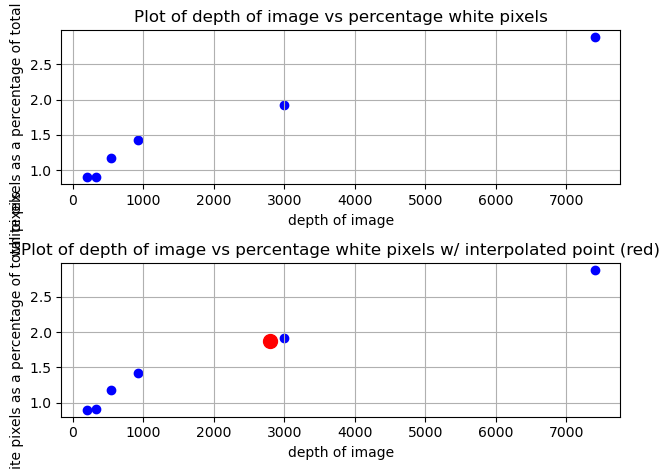

In [3]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage (This is for the linear interpolatation.)

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The interpolated point is at the x-coordinate 2800.0 and y-coordinate 1.8830351075790843.


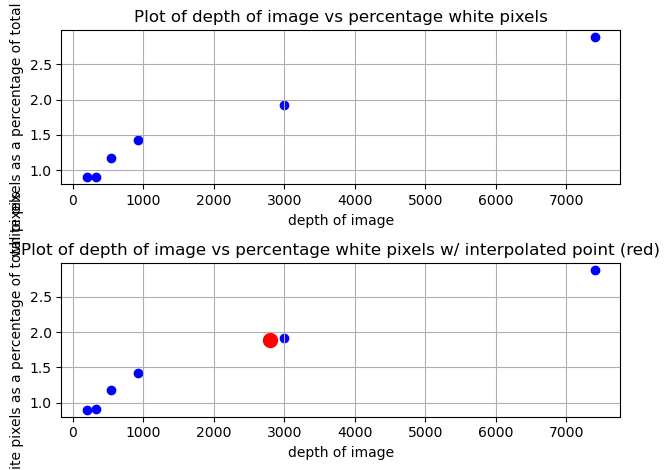

In [4]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage (This is for the quadratic interpolatation.)

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The interpolated point is at the x-coordinate 2800.0 and y-coordinate 1.8837042572149083.


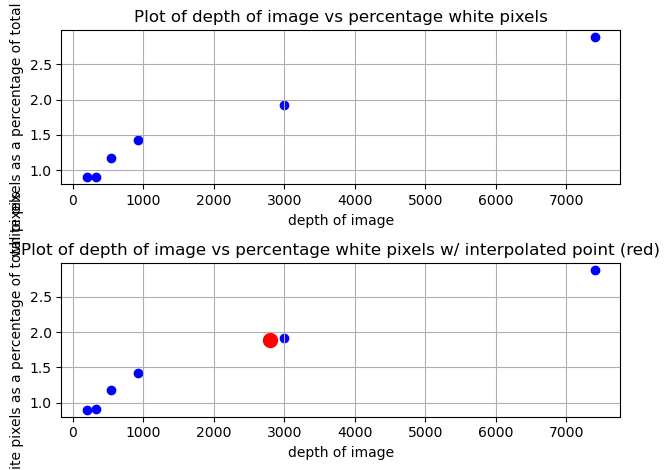

In [5]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage (This is for the cubic interpolatation.)

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='cubic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

The plotted “percent white pixels” data supports the conclusion that fibrosis increases with greater lung depth. This trend is consistently observed across all three fitted models, linear, quadratic, and cubic. Furthermore, the estimated values are consistent with the measured data points. For instance, at a depth of 2800 µm, the predicted percent white pixels was 1.872 for the linear model and 1.883 for the quadratic model. These values closely match the experimentally measured value of 1.7457 obtained from Dr. Pierce-Cottler’s dataset, which supported the trend of and increase in depth of the lung means an increase in the fibrosis. Additonally, the relationship between fibriosis and depth is shown in previous studies. For example, research on idiopathic pulmonary fibrosis shows that fibrotic scarring tends to increase towards the basal regions(lower parts) of the lungs comared tot he subpleural (outer) regions. This goes in hand with an increase in fibrosis with lung depth in our analysis. 

Raghu, G., Collard, H. R., Egan, J. J., Martinez, F. J., Behr, J., Brown, K. K., Colby, T. V., Cordier, F., Flaherty, K. R., Lasky, J. A., Lynch, D. A., Ryu, J. H., Swigris, J. J., Wells, A. U., Ancochea, J., Bouros, D., Carvalho, C., Costabel, U., Ebina, M., . . .  Schünemann, H. J. (2011). An Official ATS/ERS/JRS/ALAT Statement: Idiopathic Pulmonary Fibrosis: Evidence-based Guidelines for Diagnosis and Management. American Journal of Respiratory and Critical Care Medicine, 183(6), 788. https://doi.org/10.1164/rccm.2009-040GL

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

This project shows how image analysis can be used to detect lung fibrosis at varying depths of the lungs. By quantifying fibrotic tissue with the percent of white pixels, we can develop a device with the ability to scan a patient's lungs and determine what parts and depths the lung has been affected by fibrosis. 
The ethical implications of this device are somthing that must be carfully considered, as with anything in the medical space. This technology could be very expensive as it is a new device and as such is might not be avalible to those who are finacial worse off. Also this is a disease that can have a large impact on the patients lives, and misidentifying the depth or severity of fibrosis or failing to diagnose it can have disaterous consiquences. This device must include multiple safety testing and valitation to ensure that it has high accuracy and reliablity. Another important ethical consideration is that the data used in this study was collected solely from mice. As a result, the findings may not directly translate to human physiology. Therefore, it is important to validate our image analysis methods using human lung tissue to ensure the accuracy and clinical relevance of the results.

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

There are a few limitations to this technology right now. First, all of the data we used came from mice, and since their lung biology is different from humans, the results might not perfectly match what we would see in people. We also worked with a pretty small dataset, since we only had access to a limited number of scans. In the future, we would need to run several more trials with larger datasets to make sure our model works consistently. We could start by using our 78 scans from the mice, and then increase it to other scans. Another challenge is that it’s hard to fully filter out areas that aren’t actually lung fibrosis but still show up as white pixels on the scan like viens, which can make the results less accurate.

There are several ways we could improve this project moving forward. For example, having more access to data, especially from humans, would help us make a model that’s more accurate and applicable to real patients. Another improvement would be to create a 3D model of the lungs instead of using just 2D cross-sections. This would give us a better idea of how much of the lung is actually affected by fibrosis and make our device more precise overall. 

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

We worked on changing the filenames and depths in our code, so that code would run and we would be able to create a csv file with the filename, depth, and perecent of white count. We also worked on diesease background, so that we would be able to gain more understanding about the diesease. 

Oct. 9, 2025: 
In class, we worked on making multiple interpolation graphs, such as linear, quadratic, and cubic graphs. Then we are working on finalizing our background information and starting to work on the other sections of the templete. All th work needed to be completed before the final jupyter submission was communication to partner through text. 

Oct. 16, 2025:
Completed the limitations and future works, conclusion, verfication, and the data set analysis. 


## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

We don't have any questions right now. 